## Fanancial Risk Analysis and Detection 

In [1]:
#import liberies
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import zipfile


In [2]:
big4_df = pd.read_csv("big4_financial_risk_compliance.csv")

In [3]:
big4_df

,Year,Firm_Name,Total_Audit_Engagements,High_Risk_Cases,Compliance_Violations,Fraud_Cases_Detected,Industry_Affected,Total_Revenue_Impact,AI_Used_for_Auditing,Employee_Workload,Audit_Effectiveness_Score,Client_Satisfaction_Score
0,2020,PwC,2829,51,123,39,Healthcare,114.24,No,57,5.8,8.4
1,2022,Deloitte,3589,185,30,60,Healthcare,156.98,Yes,58,5.3,6.7
2,2020,PwC,2438,212,124,97,Healthcare,131.83,No,76,6.1,6.2
3,2021,PwC,2646,397,55,97,Healthcare,229.11,No,60,5.1,8.6
4,2020,PwC,2680,216,99,46,Healthcare,48.00,No,51,9.1,6.7
...,...,...,...,...,...,...,...,...,...,...,...,...
95,2022,KPMG,4179,77,58,69,Healthcare,89.79,Yes,74,7.6,5.6
96,2020,Ernst & Young,2119,112,153,59,Tech,182.06,No,42,8.4,9.3
97,2021,Deloitte,3810,463,35,96,Healthcare,349.04,No,55,6.4,6.5
98,2025,Deloitte,1896,110,151,14,Finance,456.08,No,74,8.7,7.1


In [4]:
big4_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       100 non-null    int64  
 1   Firm_Name                  100 non-null    object 
 2   Total_Audit_Engagements    100 non-null    int64  
 3   High_Risk_Cases            100 non-null    int64  
 4   Compliance_Violations      100 non-null    int64  
 5   Fraud_Cases_Detected       100 non-null    int64  
 6   Industry_Affected          100 non-null    object 
 7   Total_Revenue_Impact       100 non-null    float64
 8   AI_Used_for_Auditing       100 non-null    object 
 9   Employee_Workload          100 non-null    int64  
 10  Audit_Effectiveness_Score  100 non-null    float64
 11  Client_Satisfaction_Score  100 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 9.5+ KB


In [5]:
big4_df.describe()

,Year,Total_Audit_Engagements,High_Risk_Cases,Compliance_Violations,Fraud_Cases_Detected,Total_Revenue_Impact,Employee_Workload,Audit_Effectiveness_Score,Client_Satisfaction_Score
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2022.320000,2784.520000,277.730000,105.480000,52.700000,272.539000,60.250000,7.490000,7.339000
std,1.780251,1281.863073,135.735174,55.370101,28.311221,139.151401,11.163048,1.516209,1.429127
min,2020.000000,603.000000,51.000000,10.000000,5.000000,33.460000,40.000000,5.000000,5.000000
25%,2021.000000,1768.250000,162.500000,54.500000,27.000000,155.217500,52.750000,6.100000,6.100000
50%,2022.000000,2650.000000,293.000000,114.500000,54.000000,264.450000,60.000000,7.450000,7.350000
75%,2024.000000,4008.750000,395.500000,149.500000,74.500000,406.090000,68.000000,8.825000,8.525000
max,2025.000000,4946.000000,500.000000,200.000000,100.000000,497.060000,80.000000,10.000000,10.000000


In [6]:
big4_df["Industry_Affected"].unique()

array(['Healthcare', 'Finance', 'Retail', 'Tech'], dtype=object)

In [7]:
big4_df["Year"].unique()

array([2020, 2022, 2021, 2023, 2024, 2025], dtype=int64)

In [8]:
big4_df_2025 = big4_df[big4_df["Year"] == 2025]
big4_df_2025.reset_index(drop = True,inplace = True)

In [9]:
big4_df_2025.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       16 non-null     int64  
 1   Firm_Name                  16 non-null     object 
 2   Total_Audit_Engagements    16 non-null     int64  
 3   High_Risk_Cases            16 non-null     int64  
 4   Compliance_Violations      16 non-null     int64  
 5   Fraud_Cases_Detected       16 non-null     int64  
 6   Industry_Affected          16 non-null     object 
 7   Total_Revenue_Impact       16 non-null     float64
 8   AI_Used_for_Auditing       16 non-null     object 
 9   Employee_Workload          16 non-null     int64  
 10  Audit_Effectiveness_Score  16 non-null     float64
 11  Client_Satisfaction_Score  16 non-null     float64
dtypes: float64(3), int64(6), object(3)
memory usage: 1.6+ KB


In [10]:
big4_df_2025.describe()

,Year,Total_Audit_Engagements,High_Risk_Cases,Compliance_Violations,Fraud_Cases_Detected,Total_Revenue_Impact,Employee_Workload,Audit_Effectiveness_Score,Client_Satisfaction_Score
count,16.0,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,2025.0,3015.812500,269.500000,125.375000,58.312500,335.516250,58.750000,7.625000,7.437500
std,0.0,1484.754625,131.973735,57.446642,28.027888,105.441124,13.791302,1.506652,1.264318
min,2025.0,718.000000,63.000000,38.000000,12.000000,140.290000,40.000000,5.100000,5.600000
25%,2025.0,1800.250000,146.000000,65.000000,46.500000,276.817500,44.750000,6.150000,6.550000
50%,2025.0,3038.500000,306.500000,145.000000,58.500000,318.420000,58.500000,7.550000,7.350000
75%,2025.0,4456.500000,361.750000,170.500000,83.250000,430.662500,69.500000,8.875000,8.400000
max,2025.0,4775.000000,497.000000,198.000000,94.000000,485.640000,78.000000,9.800000,9.600000


In [11]:
big4_df_2025.sort_values(by = ["High_Risk_Cases"],ascending = False,inplace = True)

C:\Users\Efo Coder\AppData\Local\Temp\ipykernel_12536\1953037376.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big4_df_2025.sort_values(by = ["High_Risk_Cases"],ascending = False,inplace = True)


In [12]:
first_05_high_risk_cases_2025 = big4_df_2025["High_Risk_Cases"][:5]
first_05_industry_affected = big4_df_2025["Industry_Affected"][:5]
firms_names_05_affected = big4_df_2025["Firm_Name"][:5]

In [13]:
list_first_05_industry_affected = list(first_05_industry_affected)
list_firms_names_05_affected = list(firms_names_05_affected)
list_first_05_high_risk_cases_2025 = list(first_05_high_risk_cases_2025)

combine_list = []
for l in zip(list_first_05_industry_affected,list_firms_names_05_affected,):
     combine_list.append(str(l))
list_first_05_high_risk_cases_2025
print(combine_list)

["('Finance', 'Ernst & Young')", "('Finance', 'Deloitte')", "('Finance', 'PwC')", "('Tech', 'Deloitte')", "('Retail', 'Deloitte')"]


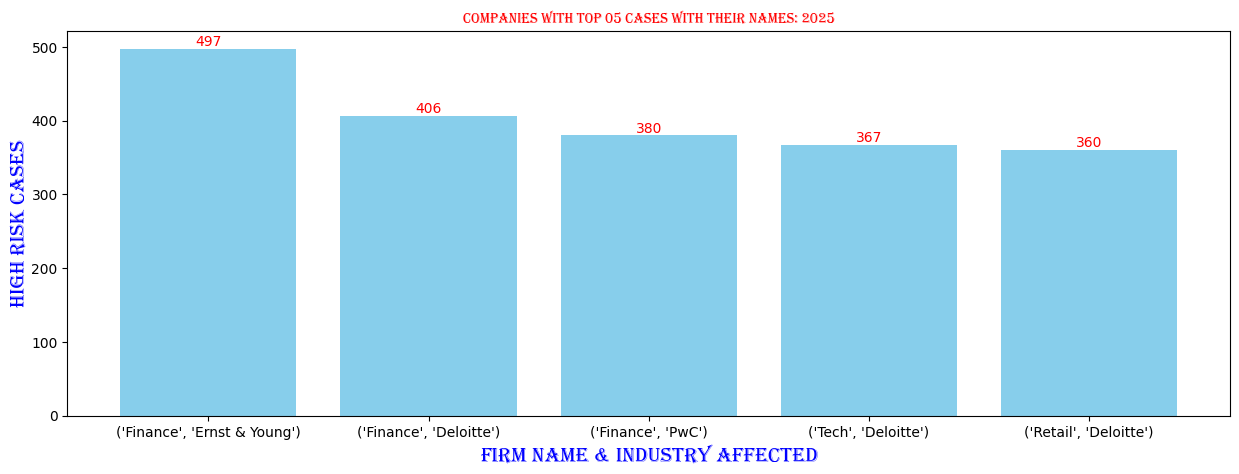

In [14]:

plt.figure(figsize=(15,5))
bar_label = plt.bar(x = combine_list,height = list_first_05_high_risk_cases_2025,color = "skyblue")
plt.bar_label(bar_label,labels = list_first_05_high_risk_cases_2025,c = "r")
plt.xlabel("Firm Name & Industry Affected",fontsize = 15,c = "b",font= "ALGERIAN")
plt.ylabel("High Risk Cases",fontsize = 15,c = "b",font= "ALGERIAN")
plt.title("Companies With Top 05 Cases With Their Names: 2025",fontsize = 40,c = "r",font= "ALGERIAN")
plt.show();

In [15]:
fraud_cases_detected_05 = big4_df_2025["Fraud_Cases_Detected"][:5]
fraud_cases_detected_05

3    56
0    69
6    87
9    51
5    14
Name: Fraud_Cases_Detected, dtype: int64

In [16]:
big2025 = big4_df_2025.iloc[:5]
big2025

,Year,Firm_Name,Total_Audit_Engagements,High_Risk_Cases,Compliance_Violations,Fraud_Cases_Detected,Industry_Affected,Total_Revenue_Impact,AI_Used_for_Auditing,Employee_Workload,Audit_Effectiveness_Score,Client_Satisfaction_Score
3,2025,Ernst & Young,4773,497,186,56,Finance,197.87,Yes,44,9.4,6.1
0,2025,Deloitte,760,406,65,69,Finance,140.29,Yes,40,5.1,7.5
6,2025,PwC,4775,380,139,87,Finance,429.95,Yes,53,8.8,5.8
9,2025,Deloitte,4390,367,167,51,Tech,334.56,Yes,59,7.8,9.6
5,2025,Deloitte,718,360,193,14,Retail,432.80,No,64,7.3,8.9


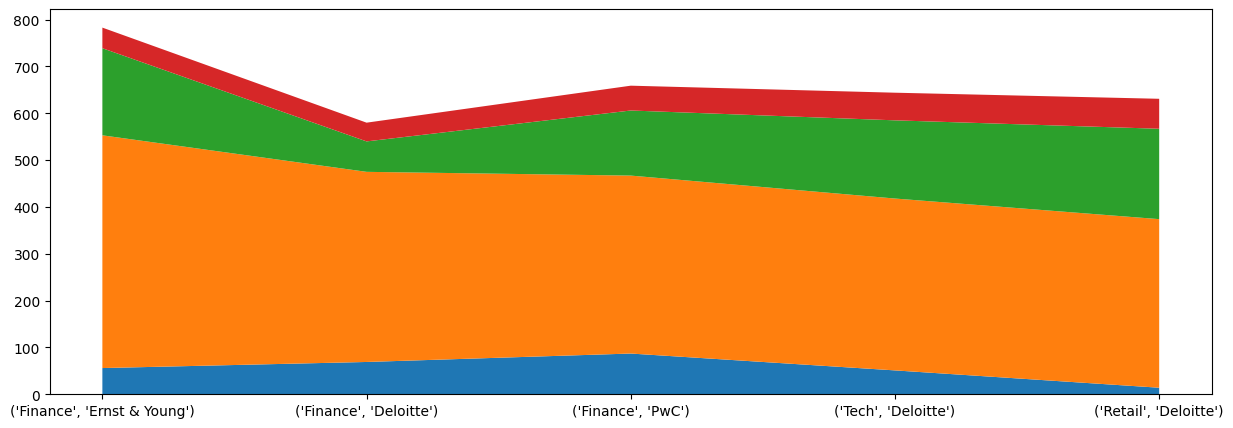

In [17]:
plt.figure(figsize=(15,5))
plt.stackplot(combine_list,fraud_cases_detected_05,list_first_05_high_risk_cases_2025,big2025["Compliance_Violations"],big2025["Employee_Workload"])
plt.show();

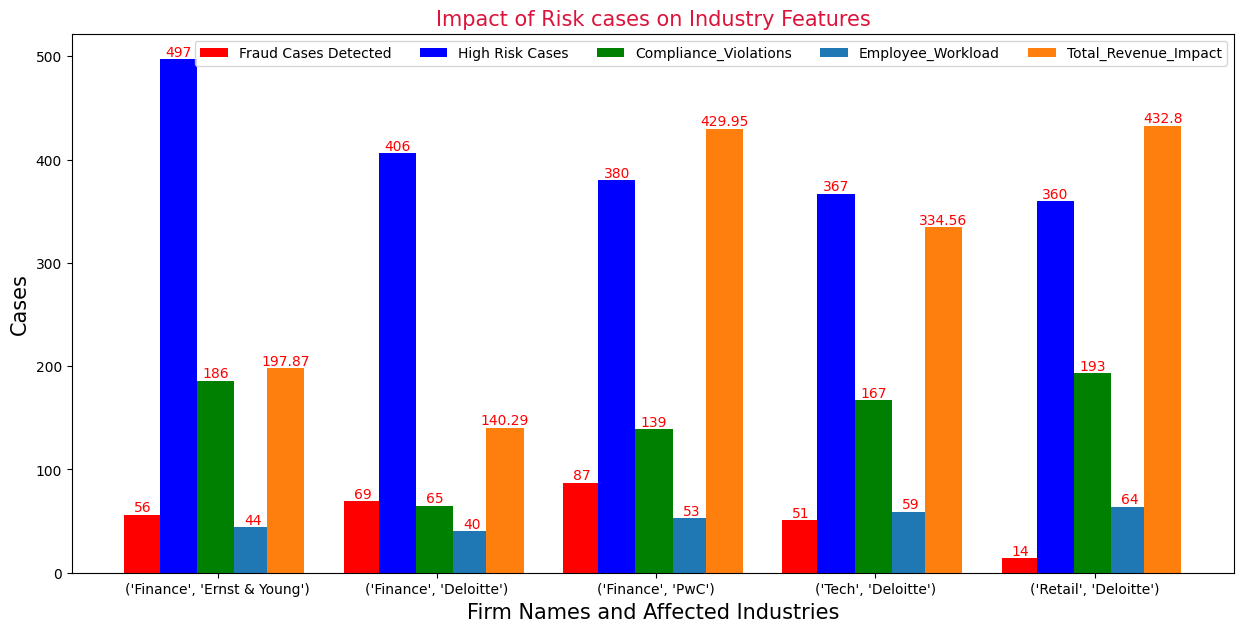

In [18]:
high_risk = big2025["High_Risk_Cases"]
compliance_vio = big2025["Compliance_Violations"]
emp_workload = big2025["Employee_Workload"]
total_rev = big2025["Total_Revenue_Impact"]

width = 0.17
x = np.arange(len(combine_list))
plt.figure(figsize = (15,7))

bar_lab = plt.bar(x + 0.1,fraud_cases_detected_05,width = width,label = "Fraud Cases Detected",color = "r")
plt.bar_label(bar_lab,fraud_cases_detected_05,c = "r")

bar_lab = plt.bar(x + 0.26, high_risk,width = width,label = "High Risk Cases",color='b')
plt.bar_label(bar_lab, high_risk,c = "r")

bar_lab = plt.bar(x + 0.43,compliance_vio,width = width,label = "Compliance_Violations",color='g')
plt.bar_label(bar_lab,compliance_vio,c = "r")

bar_lab = plt.bar(x + 0.6,emp_workload, width = width, label = "Employee_Workload")
plt.bar_label(bar_lab,emp_workload,c = "r")

bar_lab = plt.bar(x + 0.75, total_rev,width = width, label = "Total_Revenue_Impact")
plt.bar_label(bar_lab,total_rev,c = "r")

plt.xticks(ticks = x + 0.44, labels = combine_list)
plt.xlabel("Firm Names and Affected Industries",fontsize = 15)
plt.ylabel("Cases",fontsize = 15)
plt.title("Impact of Risk cases on Industry Features",fontsize = 15,color = "crimson")
plt.legend(ncols = 5)
plt.show();

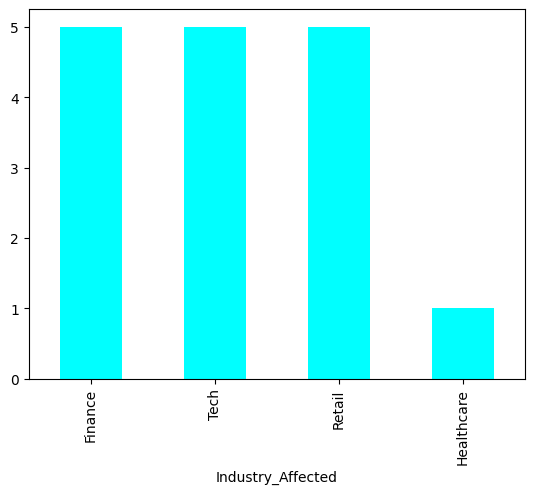

In [19]:
#Most affecteed industry in 2025
big4_df_2025["Industry_Affected"].value_counts().plot(kind = "bar",color = "aqua")
plt.show();

In [20]:
big4_df_2025["Firm_Name"].value_counts()

Firm_Name
Deloitte         6
Ernst & Young    4
PwC              4
KPMG             2
Name: count, dtype: int64

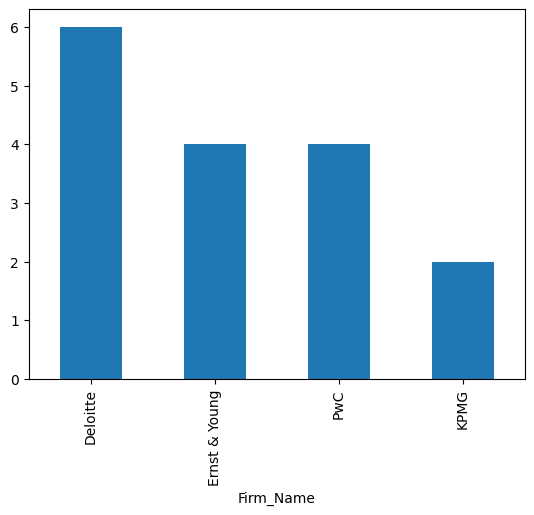

In [21]:
big4_df_2025["Firm_Name"].value_counts().plot(kind = "bar")
plt.show();

In [22]:
big4_df_2025.sort_values(by = "Total_Revenue_Impact",inplace = True,ascending = False)

C:\Users\Efo Coder\AppData\Local\Temp\ipykernel_12536\2437772811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big4_df_2025.sort_values(by = "Total_Revenue_Impact",inplace = True,ascending = False)


In [23]:
big4_df_2025

,Year,Firm_Name,Total_Audit_Engagements,High_Risk_Cases,Compliance_Violations,Fraud_Cases_Detected,Industry_Affected,Total_Revenue_Impact,AI_Used_for_Auditing,Employee_Workload,Audit_Effectiveness_Score,Client_Satisfaction_Score
14,2025,PwC,1771,158,73,33,Tech,485.64,Yes,68,9.8,8.4
4,2025,Ernst & Young,3571,86,181,90,Retail,474.21,No,58,7.4,7.6
15,2025,Deloitte,1896,110,151,14,Finance,456.08,No,74,8.7,7.1
5,2025,Deloitte,718,360,193,14,Retail,432.80,No,64,7.3,8.9
6,2025,PwC,4775,380,139,87,Finance,429.95,Yes,53,8.8,5.8
11,2025,Deloitte,2208,296,198,72,Retail,395.59,Yes,77,6.0,6.7
13,2025,PwC,4606,221,158,90,Tech,382.67,No,45,7.6,6.1
9,2025,Deloitte,4390,367,167,51,Tech,334.56,Yes,59,7.8,9.6
7,2025,Deloitte,1695,285,137,61,Tech,302.28,Yes,64,9.1,8.4
2,2025,KPMG,3852,317,65,12,Retail,294.38,No,78,6.2,7.3


In [24]:
big4_df_2025["Fraud_Cases_Detected"].corr(big4_df_2025["Total_Revenue_Impact"])

-0.16467726900172824

In [25]:
big4_df_2025.corr(numeric_only = True)

,Year,Total_Audit_Engagements,High_Risk_Cases,Compliance_Violations,Fraud_Cases_Detected,Total_Revenue_Impact,Employee_Workload,Audit_Effectiveness_Score,Client_Satisfaction_Score
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total_Audit_Engagements,NaN,1.000000,0.116032,-0.053392,0.359813,-0.087409,-0.140279,0.247133,-0.447062
High_Risk_Cases,NaN,0.116032,1.000000,0.059602,0.103282,-0.372709,-0.109518,0.182258,0.175919
Compliance_Violations,NaN,-0.053392,0.059602,1.000000,-0.051751,0.440263,0.076532,0.060272,-0.062714
Fraud_Cases_Detected,NaN,0.359813,0.103282,-0.051751,1.000000,-0.164677,-0.464246,0.016537,-0.160077
Total_Revenue_Impact,NaN,-0.087409,-0.372709,0.440263,-0.164677,1.000000,0.509488,0.375958,0.109385
Employee_Workload,NaN,-0.140279,-0.109518,0.076532,-0.464246,0.509488,1.000000,0.243840,0.140891
Audit_Effectiveness_Score,NaN,0.247133,0.182258,0.060272,0.016537,0.375958,0.243840,1.000000,0.137366
Client_Satisfaction_Score,NaN,-0.447062,0.175919,-0.062714,-0.160077,0.109385,0.140891,0.137366,1.000000


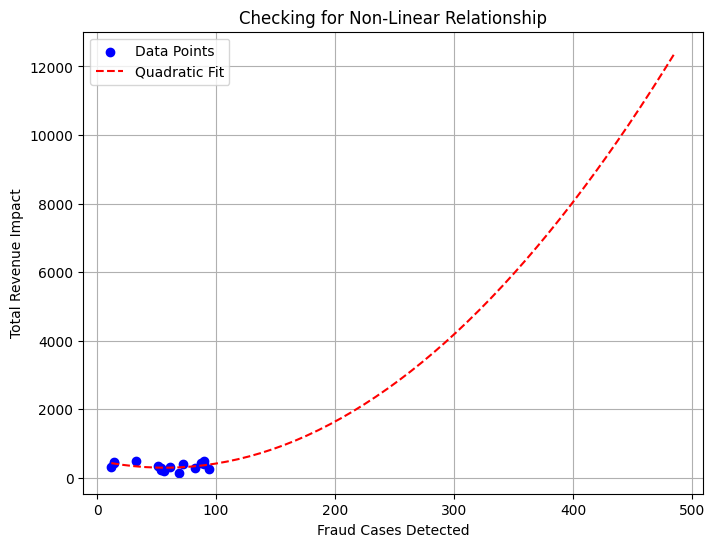

In [26]:
# Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(big4_df_2025["Fraud_Cases_Detected"], big4_df_2025["Total_Revenue_Impact"], color='b', marker='o', label="Data Points")

# Fit a polynomial (degree=2 for quadratic)
z = np.polyfit(big4_df_2025["Fraud_Cases_Detected"], big4_df_2025["Total_Revenue_Impact"], 2)  
p = np.poly1d(z)

# Plot polynomial trend line
x_range = np.linspace(min(big4_df_2025["Fraud_Cases_Detected"]), max( big4_df_2025["Total_Revenue_Impact"]))
plt.plot(x_range, p(x_range), "r--", label="Quadratic Fit")

# Labels and legend
plt.xlabel("Fraud Cases Detected")
plt.ylabel("Total Revenue Impact")
plt.title("Checking for Non-Linear Relationship")
plt.legend()
plt.grid()
plt.show()


C:\Users\Efo Coder\AppData\Local\Temp\ipykernel_12536\3520001116.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big4_df_2025["Log_Fraud_Cases_Detected"] = np.log1p(big4_df_2025["Fraud_Cases_Detected"])
C:\Users\Efo Coder\AppData\Local\Temp\ipykernel_12536\3520001116.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big4_df_2025["Log_Total_Revenue_Impact"] = np.log1p(big4_df_2025["Total_Revenue_Impact"])


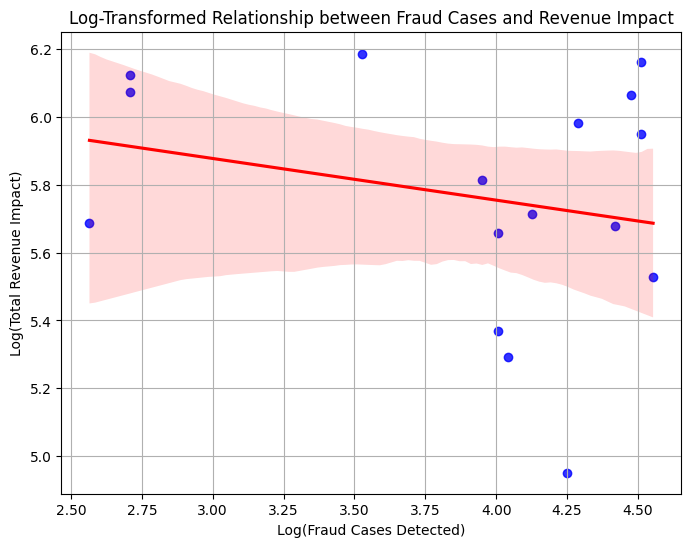

In [113]:


# Applying log transformation to avoid log(0) issues
big4_df_2025["Log_Fraud_Cases_Detected"] = np.log1p(big4_df_2025["Fraud_Cases_Detected"])
big4_df_2025["Log_Total_Revenue_Impact"] = np.log1p(big4_df_2025["Total_Revenue_Impact"])

# Scatter plot with regression line
plt.figure(figsize=(8,6))
sns.regplot(
    x=big4_df_2025["Log_Fraud_Cases_Detected"], 
    y=big4_df_2025["Log_Total_Revenue_Impact"], 
    scatter_kws={"color": "blue"}, 
    line_kws={"color": "red"}
)

plt.xlabel("Log(Fraud Cases Detected)")
plt.ylabel("Log(Total Revenue Impact)")
plt.title("Log-Transformed Relationship between Fraud Cases and Revenue Impact")
plt.grid()
plt.show()


## Both values are close to 0, meaning there's no strong monotonic relationship.

In [28]:
from scipy.stats import spearmanr, kendalltau

# Computing Spearman and Kendall correlation
spearman_corr, _ = spearmanr(big4_df_2025["Fraud_Cases_Detected"], big4_df_2025["Total_Revenue_Impact"])
kendall_corr, _ = kendalltau(big4_df_2025["Fraud_Cases_Detected"], big4_df_2025["Total_Revenue_Impact"])

print(f"Spearman Correlation: {spearman_corr:.4f}")
print(f"Kendall Correlation: {kendall_corr:.4f}")


Spearman Correlation: -0.1385
Kendall Correlation: -0.0928


C:\Users\Efo Coder\AppData\Local\Temp\ipykernel_12536\2373302483.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big4_df_2025["Log_High_Risk_Cases"] = np.log1p(big4_df_2025["High_Risk_Cases"])
C:\Users\Efo Coder\AppData\Local\Temp\ipykernel_12536\2373302483.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big4_df_2025["Log_Total_Revenue_Impact"] = np.log1p(big4_df_2025["Total_Revenue_Impact"])


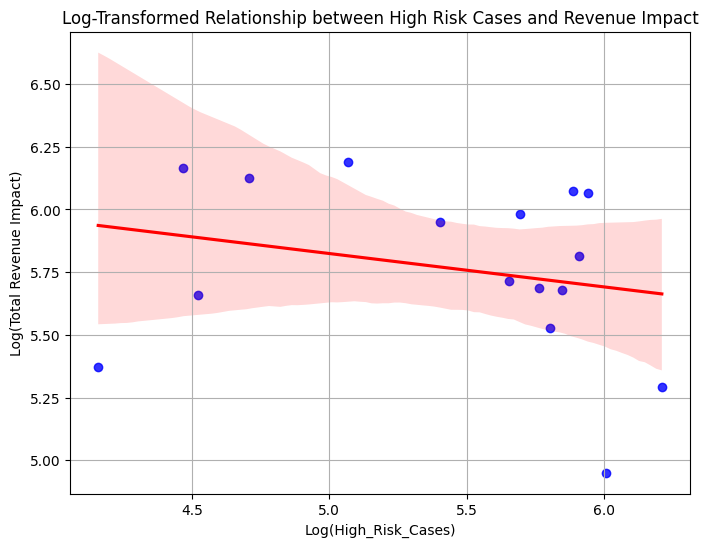

In [103]:
# Applying log transformation to avoid log(0) issues
big4_df_2025["Log_High_Risk_Cases"] = np.log1p(big4_df_2025["High_Risk_Cases"])
big4_df_2025["Log_Total_Revenue_Impact"] = np.log1p(big4_df_2025["Total_Revenue_Impact"])

# Scatter plot with regression line
plt.figure(figsize=(8,6))
sns.regplot(
    x=big4_df_2025["Log_High_Risk_Cases"], 
    y=big4_df_2025["Log_Total_Revenue_Impact"], 
    scatter_kws={"color": "blue"}, 
    line_kws={"color": "red"}
)

plt.xlabel("Log(High_Risk_Cases)")
plt.ylabel("Log(Total Revenue Impact)")
plt.title("Log-Transformed Relationship between High Risk Cases and Revenue Impact")
plt.grid()
plt.show()


## The relationship is not perfectly linear, but there is a noticeable downward trend.

In [30]:
from scipy.stats import spearmanr, kendalltau

# Computing Spearman and Kendall correlation
spearman_corr, _ = spearmanr(big4_df_2025["High_Risk_Cases"], big4_df_2025["Total_Revenue_Impact"])
kendall_corr, _ = kendalltau(big4_df_2025["High_Risk_Cases"], big4_df_2025["Total_Revenue_Impact"])

print(f"Spearman Correlation: {spearman_corr:.4f}")
print(f"Kendall Correlation: {kendall_corr:.4f}")

Spearman Correlation: -0.3265
Kendall Correlation: -0.2333


## What This Means
#### Employee Workload is positively associated with Total Revenue Impact, meaning more workload is linked to higher revenue impact.
#### The relationship is moderate, so other factors also play a role in revenue impact

C:\Users\Efo Coder\AppData\Local\Temp\ipykernel_12536\1611986545.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big4_df_2025["Log_employee_workload"] = np.log1p(big4_df_2025["Employee_Workload"])
C:\Users\Efo Coder\AppData\Local\Temp\ipykernel_12536\1611986545.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big4_df_2025["Log_Total_Revenue_Impact"] = np.log1p(big4_df_2025["Total_Revenue_Impact"])


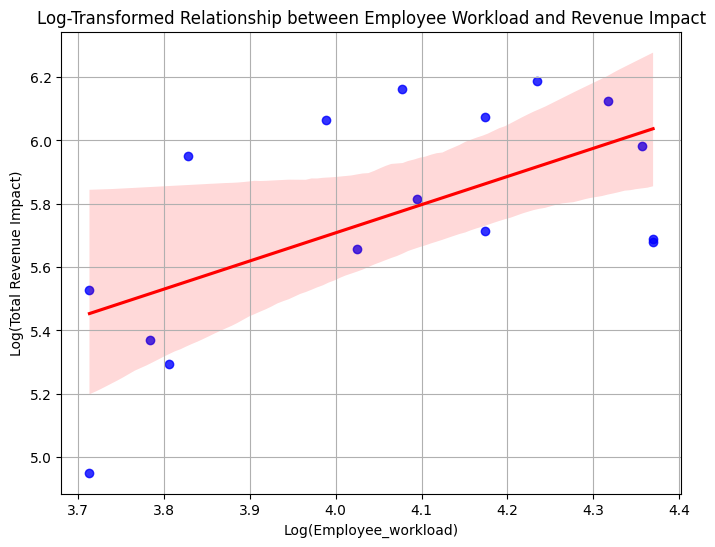

In [105]:
# Applying log transformation to avoid log(0) issues
big4_df_2025["Log_employee_workload"] = np.log1p(big4_df_2025["Employee_Workload"])
big4_df_2025["Log_Total_Revenue_Impact"] = np.log1p(big4_df_2025["Total_Revenue_Impact"])

# Scatter plot with regression line
plt.figure(figsize=(8,6))
sns.regplot(
    x=big4_df_2025["Log_employee_workload"], 
    y=big4_df_2025["Log_Total_Revenue_Impact"], 
    scatter_kws={"color": "blue"}, 
    line_kws={"color": "red"}
)

plt.xlabel("Log(Employee_workload)")
plt.ylabel("Log(Total Revenue Impact)")
plt.title("Log-Transformed Relationship between Employee Workload and Revenue Impact")
plt.grid()
plt.show()


In [32]:
from scipy.stats import spearmanr, kendalltau

# Computing Spearman and Kendall correlation
spearman_corr, _ = spearmanr(big4_df_2025["Employee_Workload"], big4_df_2025["Total_Revenue_Impact"])
kendall_corr, _ = kendalltau(big4_df_2025["Employee_Workload"], big4_df_2025["Total_Revenue_Impact"])

print(f"Spearman Correlation: {spearman_corr:.4f}")
print(f"Kendall Correlation: {kendall_corr:.4f}")

Spearman Correlation: 0.5203
Kendall Correlation: 0.3460


#### What This Means
##### More audit engagements are slightly linked to lower revenue impact, but the effect is weak.
##### This could mean:
#### Higher audit workload doesn’t necessarily translate to higher revenue.
##### Not all audit engagements contribute equally to revenue.
##### Operational efficiency, audit complexity, or pricing strategies might be influencing revenue impact more than just the count of engagements.

C:\Users\Efo Coder\AppData\Local\Temp\ipykernel_12536\3436969081.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big4_df_2025["Log_Total_Audit_Engagements"] = np.log1p(big4_df_2025["Total_Audit_Engagements"])
C:\Users\Efo Coder\AppData\Local\Temp\ipykernel_12536\3436969081.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big4_df_2025["Log_Total_Revenue_Impact"] = np.log1p(big4_df_2025["Total_Revenue_Impact"])


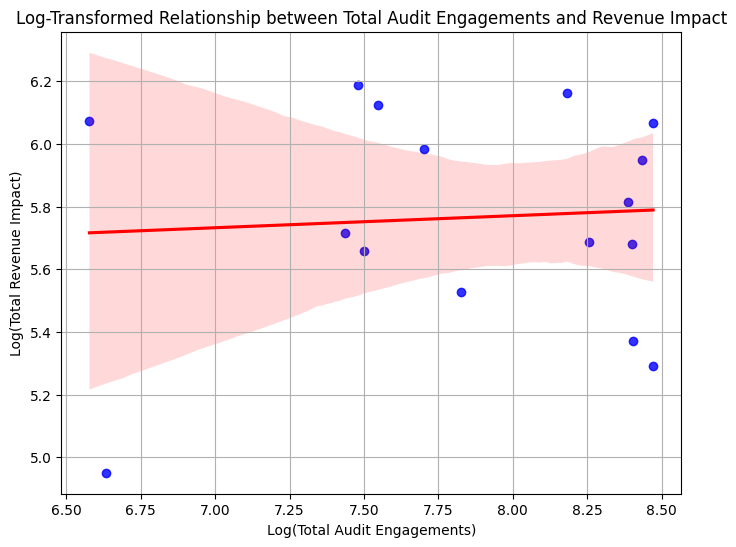

In [109]:
# Applying log transformation to avoid log(0) issues
big4_df_2025["Log_Total_Audit_Engagements"] = np.log1p(big4_df_2025["Total_Audit_Engagements"])
big4_df_2025["Log_Total_Revenue_Impact"] = np.log1p(big4_df_2025["Total_Revenue_Impact"])

# Scatter plot with regression line
plt.figure(figsize=(8,6))
sns.regplot(
    x=big4_df_2025["Log_Total_Audit_Engagements"], 
    y=big4_df_2025["Log_Total_Revenue_Impact"], 
    scatter_kws={"color": "blue"}, 
    line_kws={"color": "red"}
)

plt.xlabel("Log(Total Audit Engagements)")
plt.ylabel("Log(Total Revenue Impact)")
plt.title("Log-Transformed Relationship between Total Audit Engagements and Revenue Impact")
plt.grid()
plt.show()


In [34]:
from scipy.stats import spearmanr, kendalltau

# Computing Spearman and Kendall correlation
spearman_corr, _ = spearmanr(big4_df_2025["Total_Audit_Engagements"], big4_df_2025["Total_Revenue_Impact"])
kendall_corr, _ = kendalltau(big4_df_2025["Total_Audit_Engagements"], big4_df_2025["Total_Revenue_Impact"])

print(f"Spearman Correlation: {spearman_corr:.4f}")
print(f"Kendall Correlation: {kendall_corr:.4f}")

Spearman Correlation: -0.1706
Kendall Correlation: -0.1333


##### What This Means
##### Organizations with more compliance violations tend to have a higher total revenue impact.
##### This could mean:
##### Non-compliance penalties/fines increase revenue impact negatively.
##### Regulatory scrutiny might lead to operational disruptions.
##### Some high-revenue businesses may also be more prone to compliance violations due to complexity.

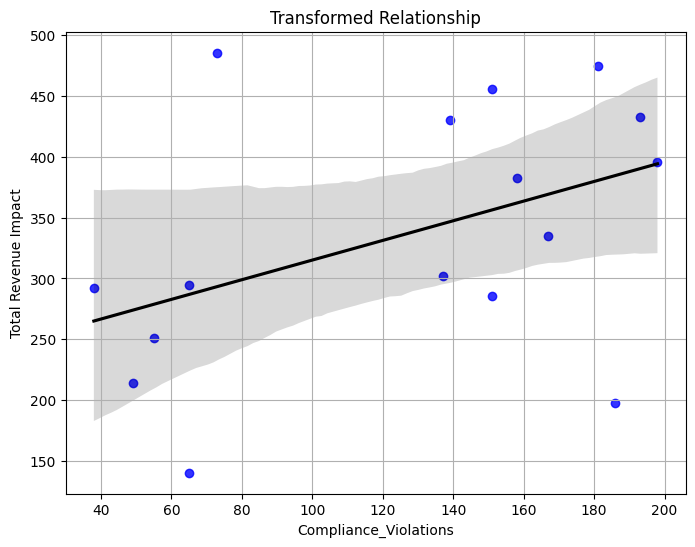

In [110]:
# Impact of compliance Violations on total revenue 
plt.figure(figsize=(8,6))
sns.regplot(x = big4_df_2025["Compliance_Violations"], y = big4_df_2025["Total_Revenue_Impact"], scatter_kws={"color": "blue"}, line_kws={"color": "black"})

plt.xlabel("Compliance_Violations")
plt.ylabel("Total Revenue Impact")
plt.title("Transformed Relationship")
plt.grid()
plt.show()

In [36]:
from scipy.stats import spearmanr, kendalltau

# Computing Spearman and Kendall correlation
spearman_corr, _ = spearmanr(big4_df_2025["Compliance_Violations"], big4_df_2025["Total_Revenue_Impact"])
kendall_corr, _ = kendalltau(big4_df_2025["Compliance_Violations"], big4_df_2025["Total_Revenue_Impact"])

print(f"Spearman Correlation: {spearman_corr:.4f}")
print(f"Kendall Correlation: {kendall_corr:.4f}")

Spearman Correlation: 0.4256
Kendall Correlation: 0.3025


## Total Fraud Cases Recorded in the Affected Industres, 2025

In [37]:
for cols in big4_df_2025["Industry_Affected"].unique():
    
       big4_2025_healthcare = big4_df_2025[big4_df_2025["Industry_Affected"] == cols]
    
    
       Total_healthcare_fraud_cases_2025 = big4_2025_healthcare["Fraud_Cases_Detected"].sum()
    
       print(f"Total Fraud Cases Recorded in {cols} 2025 :>>>>ℹ️ℹ️<<<< {Total_healthcare_fraud_cases_2025}") 

Total Fraud Cases Recorded in Tech 2025 :>>>>ℹ️ℹ️<<<< 289
Total Fraud Cases Recorded in Retail 2025 :>>>>ℹ️ℹ️<<<< 242
Total Fraud Cases Recorded in Finance 2025 :>>>>ℹ️ℹ️<<<< 308
Total Fraud Cases Recorded in Healthcare 2025 :>>>>ℹ️ℹ️<<<< 94


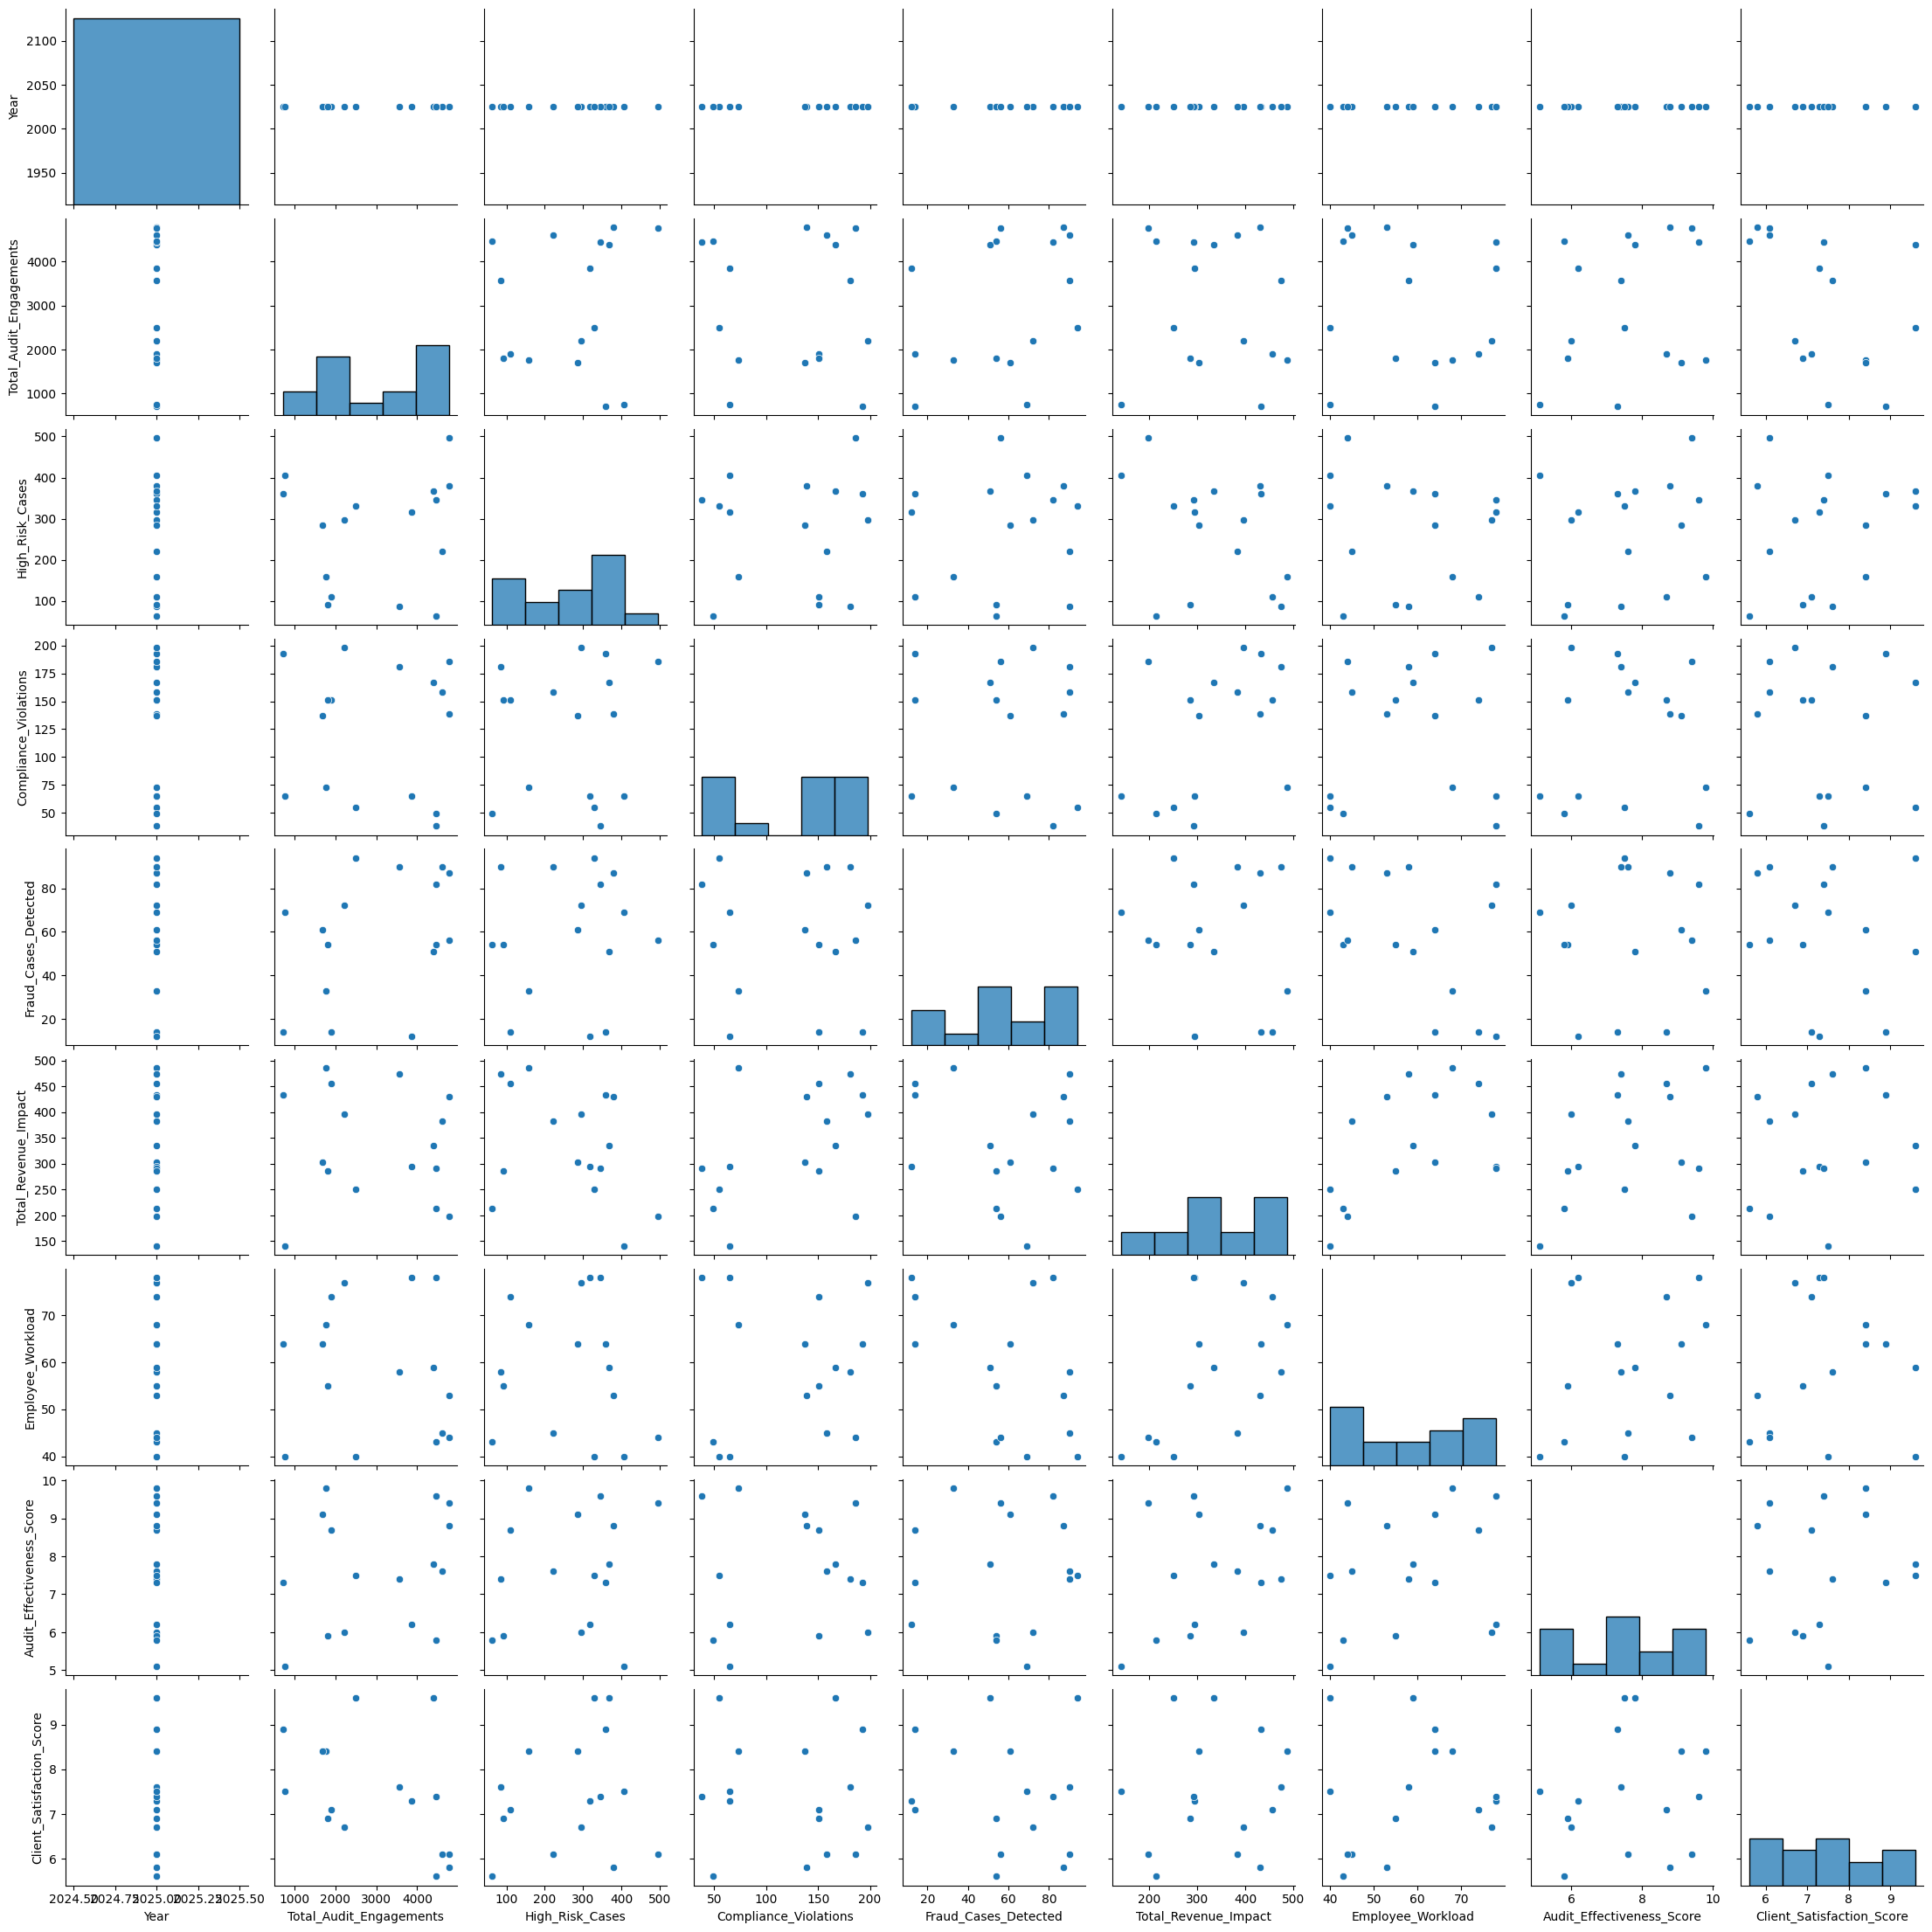

In [38]:
sns.pairplot(big4_df_2025)
plt.show();

In [39]:
big4_df["Industry_Affected"].value_counts()

Industry_Affected
Tech          29
Retail        27
Healthcare    24
Finance       20
Name: count, dtype: int64

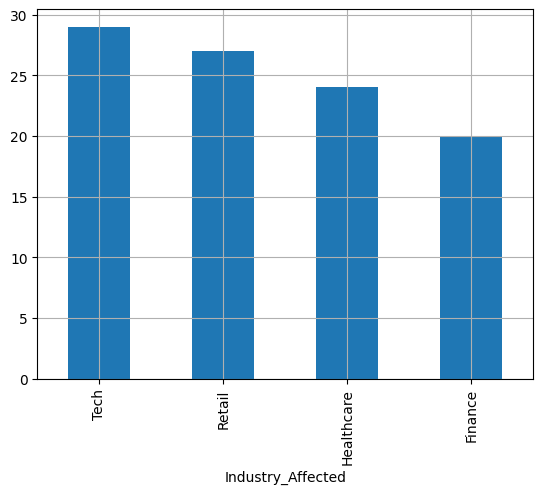

In [40]:
big4_df["Industry_Affected"].value_counts().plot(kind="bar")
plt.grid()
plt.show();

In [41]:
big4_2024 = big4_df[big4_df["Year"] == 2024]

In [42]:
big4_2024["Industry_Affected"].value_counts()

Industry_Affected
Healthcare    7
Retail        3
Tech          3
Finance       3
Name: count, dtype: int64

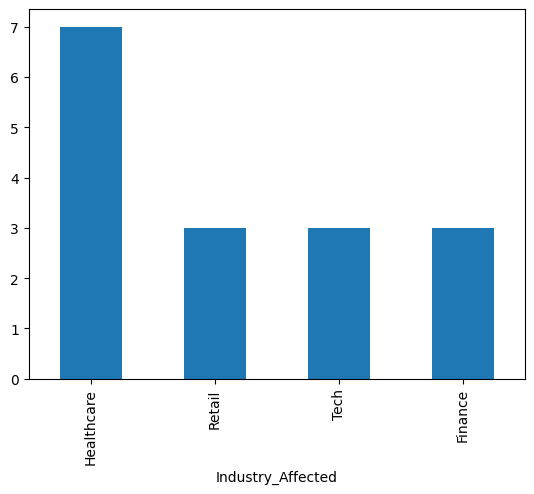

In [43]:
big4_2024["Industry_Affected"].value_counts().plot(kind = "bar")
plt.show();

In [44]:
big4_df_2025["Industry_Affected"].value_counts()

Industry_Affected
Tech          5
Retail        5
Finance       5
Healthcare    1
Name: count, dtype: int64

In [45]:
big4_2024.sort_values(by = "Fraud_Cases_Detected",inplace = True,ascending = False)

C:\Users\Efo Coder\AppData\Local\Temp\ipykernel_12536\465568608.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big4_2024.sort_values(by = "Fraud_Cases_Detected",inplace = True,ascending = False)


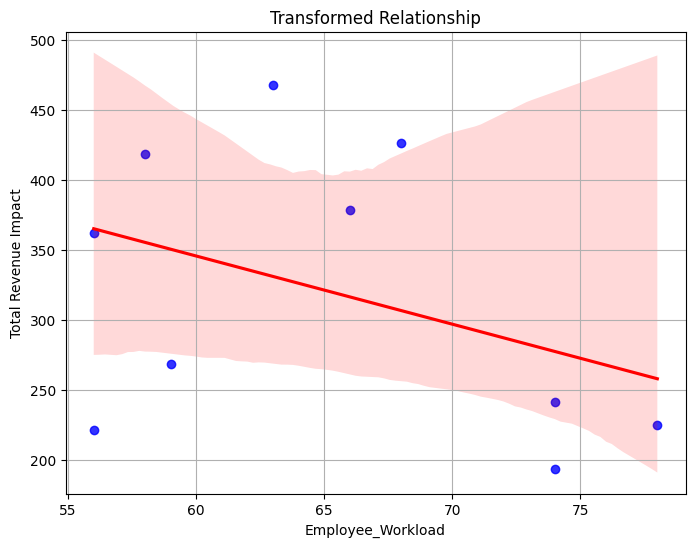

In [111]:
big4_2024_10 = big4_2024.iloc[:10]


# Impact of workload on total revenue 2024
plt.figure(figsize=(8,6))
sns.regplot(x = big4_2024_10["Employee_Workload"], y = big4_2024_10["Total_Revenue_Impact"], scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.xlabel("Employee_Workload")
plt.ylabel("Total Revenue Impact")
plt.title("Transformed Relationship")
plt.grid()
plt.show()

##### This suggests a weak negative monotonic relationship between employee workload and revenue impact.
##### As workload increases, revenue impact tends to decrease, but not in a perfectly linear way.

In [47]:
from scipy.stats import spearmanr, kendalltau

# Computing Spearman and Kendall correlation
spearman_corr, _ = spearmanr(big4_2024_10["Employee_Workload"], big4_2024_10["Total_Revenue_Impact"])
kendall_corr, _ = kendalltau(big4_2024_10["Employee_Workload"], big4_2024_10["Total_Revenue_Impact"])

print(f"Spearman Correlation: {spearman_corr:.4f}")
print(f"Kendall Correlation: {kendall_corr:.4f}")

Spearman Correlation: -0.2317
Kendall Correlation: -0.1591


In [48]:
big4_2024_10

,Year,Firm_Name,Total_Audit_Engagements,High_Risk_Cases,Compliance_Violations,Fraud_Cases_Detected,Industry_Affected,Total_Revenue_Impact,AI_Used_for_Auditing,Employee_Workload,Audit_Effectiveness_Score,Client_Satisfaction_Score
59,2024,Deloitte,1275,201,20,100,Retail,378.30,No,66,8.5,7.8
43,2024,KPMG,3958,442,115,94,Healthcare,468.13,No,63,5.2,5.2
12,2024,Deloitte,2885,469,125,92,Healthcare,418.49,No,58,9.3,7.7
56,2024,Ernst & Young,2556,306,45,91,Finance,426.07,No,68,5.3,5.1
88,2024,PwC,2676,176,36,82,Finance,362.31,Yes,56,9.5,7.9
68,2024,Ernst & Young,1825,377,31,80,Tech,193.07,No,74,6.0,9.5
71,2024,Deloitte,4784,382,15,73,Healthcare,268.67,No,59,6.7,10.0
20,2024,Deloitte,1581,247,181,72,Retail,221.42,No,56,5.6,7.9
11,2024,Ernst & Young,2712,408,186,61,Healthcare,224.92,Yes,78,9.5,8.9
77,2024,PwC,1574,391,19,50,Tech,240.87,No,74,8.3,5.3


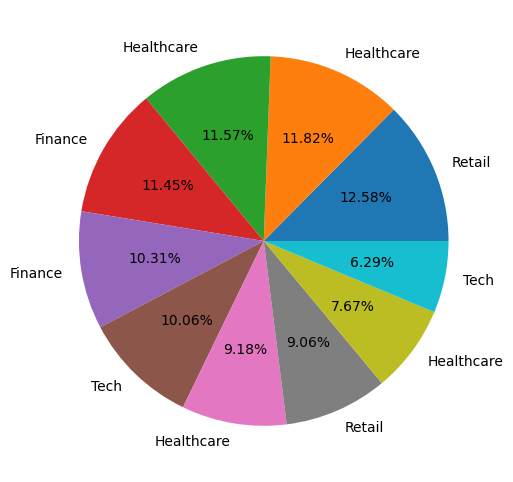

In [99]:
# The First 10 maximum Fraud Cases Detected and Their Affected Industries, 2024

plt.figure(figsize = (10,6))
plt.pie(x = big4_2024_10["Fraud_Cases_Detected"], labels =  big4_2024_10["Industry_Affected"], autopct = "%.2f%%")
plt.show()

## Total Fraud Cases Recorded in the Affected Industries, 2024

In [50]:
for cols in big4_2024["Industry_Affected"].unique():
    
       big4_2024_healthcare = big4_2024[big4_2024["Industry_Affected"] == cols]
    
    
       Total_healthcare_fraud_cases_2024 = big4_2024_healthcare["Fraud_Cases_Detected"].sum()
    
    
       print(f"Total Fraud Cases Recorded in {cols} 2024 :>>>>ℹ️ℹ️<<<< {Total_healthcare_fraud_cases_2024}")      
        
        
        

Total Fraud Cases Recorded in Retail 2024 :>>>>ℹ️ℹ️<<<< 189
Total Fraud Cases Recorded in Healthcare 2024 :>>>>ℹ️ℹ️<<<< 387
Total Fraud Cases Recorded in Finance 2024 :>>>>ℹ️ℹ️<<<< 200
Total Fraud Cases Recorded in Tech 2024 :>>>>ℹ️ℹ️<<<< 162


## Total Compliance Violations Recorded in the Affected Industres, 2024

Total Compliance Violations Recorded in Retail 2024 :>>>>ℹ️ℹ️<<<< 268
Total Compliance Violations Recorded in Healthcare 2024 :>>>>ℹ️ℹ️<<<< 969
Total Compliance Violations Recorded in Finance 2024 :>>>>ℹ️ℹ️<<<< 106
Total Compliance Violations Recorded in Tech 2024 :>>>>ℹ️ℹ️<<<< 186
🧑‍⚕️🧑‍⚕️🧑‍⚕️🧑‍⚕️🧑‍⚕️🧑‍⚕️🧑‍⚕️🧑‍⚕️🧑‍⚕️🧑‍⚕️🧑‍⚕️🧑‍⚕️🧑‍⚕️


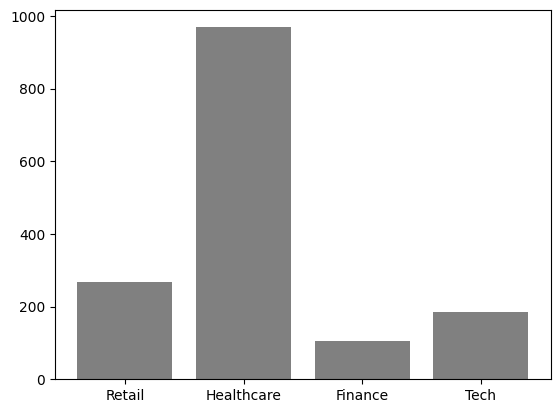

In [51]:
comp_dict = {}

for cols in big4_2024["Industry_Affected"].unique():
    
       big4_2024_ = big4_2024[big4_2024["Industry_Affected"] == cols]
    
    
       Total_comp_viol_2024 = big4_2024_["Compliance_Violations"].sum()
    
    
       print(f"Total Compliance Violations Recorded in {cols} 2024 :>>>>ℹ️ℹ️<<<< {Total_comp_viol_2024}")      

       comp_dict[cols] = Total_comp_viol_2024

print("🧑‍⚕️🧑‍⚕️🧑‍⚕️🧑‍⚕️🧑‍⚕️🧑‍⚕️🧑‍⚕️🧑‍⚕️🧑‍⚕️🧑‍⚕️🧑‍⚕️🧑‍⚕️🧑‍⚕️")

plt.bar(x = comp_dict.keys(),height = comp_dict.values(),color = "gray")
plt.show();

## Total Risk Cases Recorded in the Affected Industries, 2024

In [52]:
for cols in big4_2024["Industry_Affected"].unique():
    
       big4_2024_ = big4_2024[big4_2024["Industry_Affected"] == cols]
    
    
       Total_Risk_Cases_2024 = big4_2024_["High_Risk_Cases"].sum()
    
    
       print(f"Total Risk Cases Recorded in {cols} 2024 :>>>>ℹ️ℹ️<<<< {Total_Risk_Cases_2024}")   

Total Risk Cases Recorded in Retail 2024 :>>>>ℹ️ℹ️<<<< 534
Total Risk Cases Recorded in Healthcare 2024 :>>>>ℹ️ℹ️<<<< 3022
Total Risk Cases Recorded in Finance 2024 :>>>>ℹ️ℹ️<<<< 931
Total Risk Cases Recorded in Tech 2024 :>>>>ℹ️ℹ️<<<< 1026


Total Fraud Cases Detectded in Deloitte 2024 :>>>>ℹ️ℹ️<<<< 390
Total Fraud Cases Detectded in KPMG 2024 :>>>>ℹ️ℹ️<<<< 94
Total Fraud Cases Detectded in Ernst & Young 2024 :>>>>ℹ️ℹ️<<<< 275
Total Fraud Cases Detectded in PwC 2024 :>>>>ℹ️ℹ️<<<< 179
🧑‍⚕️🧑‍⚕️🧑‍⚕️🧑‍⚕️🧑‍⚕️🧑‍⚕️🧑‍⚕️🧑‍⚕️🧑‍⚕️🧑‍⚕️🧑‍⚕️🧑‍⚕️🧑‍⚕️


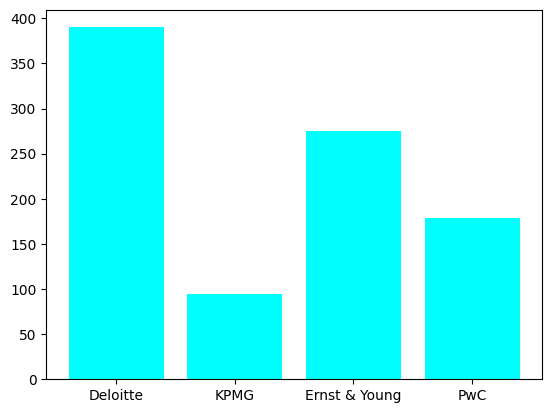

In [53]:
# Total Fraud Cases Dettected in Firm Name, 2024

fraud_dict = {}

for cols in big4_2024["Firm_Name"].unique():
    
       big4_2024_ = big4_2024[big4_2024["Firm_Name"] == cols]
    
       Total_fraud_Cases_2024 = big4_2024_["Fraud_Cases_Detected"].sum()
    
    
       print(f"Total Fraud Cases Detectded in {cols} 2024 :>>>>ℹ️ℹ️<<<< {Total_fraud_Cases_2024}")   

       fraud_dict[cols] = Total_fraud_Cases_2024

print("🧑‍⚕️🧑‍⚕️🧑‍⚕️🧑‍⚕️🧑‍⚕️🧑‍⚕️🧑‍⚕️🧑‍⚕️🧑‍⚕️🧑‍⚕️🧑‍⚕️🧑‍⚕️🧑‍⚕️")

plt.bar(x = fraud_dict.keys(),height = fraud_dict.values(),color = "aqua")
plt.show();

### Total Revenue impact by Affected Industries, 2024.

Total Fraud Cases Detectded in Retail 2024 :>>>>ℹ️ℹ️<<<< 806.0
Total Fraud Cases Detectded in Healthcare 2024 :>>>>ℹ️ℹ️<<<< 2181.0
Total Fraud Cases Detectded in Finance 2024 :>>>>ℹ️ℹ️<<<< 1052.0
Total Fraud Cases Detectded in Tech 2024 :>>>>ℹ️ℹ️<<<< 591.0
🧑‍⚕️🧑‍⚕️🧑‍⚕️🧑‍⚕️🧑‍⚕️🧑‍⚕️🧑‍⚕️🧑‍⚕️🧑‍⚕️🧑‍⚕️🧑‍⚕️🧑‍⚕️🧑‍⚕️


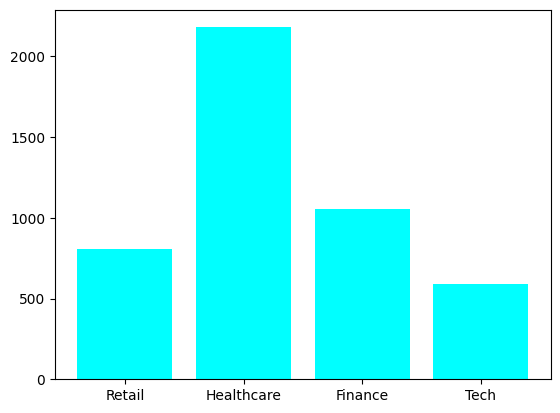

In [54]:
# Total Fraud Cases Dettected in Firm Name, 2024

revenue_dict = {}

for cols in big4_2024["Industry_Affected"].unique():
    
       big4_2024_ = big4_2024[big4_2024["Industry_Affected"] == cols]
    
       Total_revenue_impact_2024 = big4_2024_["Total_Revenue_Impact"].sum().round()
    
    
       print(f"Total Fraud Cases Detectded in {cols} 2024 :>>>>ℹ️ℹ️<<<< {Total_revenue_impact_2024}")   

       revenue_dict[cols] = Total_revenue_impact_2024

print("🧑‍⚕️🧑‍⚕️🧑‍⚕️🧑‍⚕️🧑‍⚕️🧑‍⚕️🧑‍⚕️🧑‍⚕️🧑‍⚕️🧑‍⚕️🧑‍⚕️🧑‍⚕️🧑‍⚕️")

plt.bar(x = revenue_dict.keys(),height = revenue_dict.values(),color = "aqua")
plt.show();

In [55]:
big4_df_2025["AI_Used_for_Auditing"] = big4_df_2025["AI_Used_for_Auditing"].map({"Yes": 1, "No": 0})


C:\Users\Efo Coder\AppData\Local\Temp\ipykernel_12536\3813250156.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big4_df_2025["AI_Used_for_Auditing"] = big4_df_2025["AI_Used_for_Auditing"].map({"Yes": 1, "No": 0})


In [56]:
big4_2024

,Year,Firm_Name,Total_Audit_Engagements,High_Risk_Cases,Compliance_Violations,Fraud_Cases_Detected,Industry_Affected,Total_Revenue_Impact,AI_Used_for_Auditing,Employee_Workload,Audit_Effectiveness_Score,Client_Satisfaction_Score
59,2024,Deloitte,1275,201,20,100,Retail,378.30,No,66,8.5,7.8
43,2024,KPMG,3958,442,115,94,Healthcare,468.13,No,63,5.2,5.2
12,2024,Deloitte,2885,469,125,92,Healthcare,418.49,No,58,9.3,7.7
56,2024,Ernst & Young,2556,306,45,91,Finance,426.07,No,68,5.3,5.1
88,2024,PwC,2676,176,36,82,Finance,362.31,Yes,56,9.5,7.9
68,2024,Ernst & Young,1825,377,31,80,Tech,193.07,No,74,6.0,9.5
71,2024,Deloitte,4784,382,15,73,Healthcare,268.67,No,59,6.7,10.0
20,2024,Deloitte,1581,247,181,72,Retail,221.42,No,56,5.6,7.9
11,2024,Ernst & Young,2712,408,186,61,Healthcare,224.92,Yes,78,9.5,8.9
77,2024,PwC,1574,391,19,50,Tech,240.87,No,74,8.3,5.3


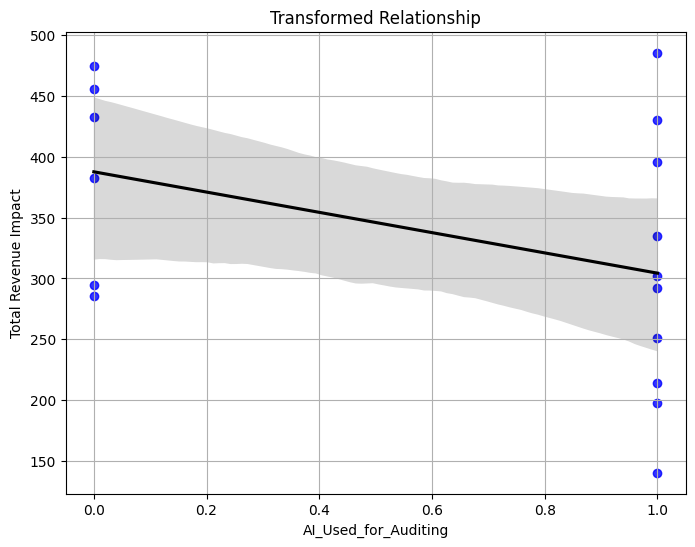

In [112]:
# Impact of AI_Used_for_Auditing on total revenue 
plt.figure(figsize=(8,6))
sns.regplot(x = big4_df_2025["AI_Used_for_Auditing"], y = big4_df_2025["Total_Revenue_Impact"], scatter_kws={"color": "blue"}, line_kws={"color": "black"})

plt.xlabel("AI_Used_for_Auditing")
plt.ylabel("Total Revenue Impact")
plt.title("Transformed Relationship")
plt.grid()
plt.show()

## The impact of AI Used For Auditing on Total Revenue

In [58]:
from scipy.stats import spearmanr, kendalltau

# Computing Spearman and Kendall correlation
spearman_corr, _ = spearmanr(big4_df_2025["AI_Used_for_Auditing"], big4_df_2025["Total_Revenue_Impact"])
kendall_corr, _ = kendalltau(big4_df_2025["AI_Used_for_Auditing"], big4_df_2025["Total_Revenue_Impact"])

print(f"Spearman Correlation: {spearman_corr:.4f}")
print(f"Kendall Correlation: {kendall_corr:.4f}")

Spearman Correlation: -0.3641
Kendall Correlation: -0.3064


In [86]:
big4_df_2025_tech = big4_df_2025[big4_df_2025["Industry_Affected"] == "Tech"]
big4_df_2025_tech

,Year,Firm_Name,Total_Audit_Engagements,High_Risk_Cases,Compliance_Violations,Fraud_Cases_Detected,Industry_Affected,Total_Revenue_Impact,AI_Used_for_Auditing,Employee_Workload,Audit_Effectiveness_Score,Client_Satisfaction_Score
14,2025,PwC,1771,158,73,33,Tech,485.64,1,68,9.8,8.4
13,2025,PwC,4606,221,158,90,Tech,382.67,0,45,7.6,6.1
9,2025,Deloitte,4390,367,167,51,Tech,334.56,1,59,7.8,9.6
7,2025,Deloitte,1695,285,137,61,Tech,302.28,1,64,9.1,8.4
1,2025,PwC,4470,63,49,54,Tech,213.92,1,43,5.8,5.6


## The impact of AI Used For Auditing on Total Revenue in the Tech industry

In [87]:
from scipy.stats import spearmanr, kendalltau

# Computing Spearman and Kendall correlation
spearman_corr, _ = spearmanr(big4_df_2025_tech["AI_Used_for_Auditing"], big4_df_2025_tech["Total_Revenue_Impact"])
kendall_corr, _ = kendalltau(big4_df_2025_tech["AI_Used_for_Auditing"], big4_df_2025_tech["Total_Revenue_Impact"])

print(f"Spearman Correlation: {spearman_corr:.4f}")
print(f"Kendall Correlation: {kendall_corr:.4f}")

Spearman Correlation: -0.3536
Kendall Correlation: -0.3162


## The impact of AI Used For Auditing on Total Revenue in the Healthcare industry

In [95]:
big4_df_2025_health = big4_df_2025[big4_df_2025["Industry_Affected"] == "Healthcare"]
big4_df_2025_health

,Year,Firm_Name,Total_Audit_Engagements,High_Risk_Cases,Compliance_Violations,Fraud_Cases_Detected,Industry_Affected,Total_Revenue_Impact,AI_Used_for_Auditing,Employee_Workload,Audit_Effectiveness_Score,Client_Satisfaction_Score
8,2025,KPMG,2506,330,55,94,Healthcare,250.74,1,40,7.5,9.6


In [96]:
from scipy.stats import spearmanr, kendalltau

# Computing Spearman and Kendall correlation
spearman_corr, _ = spearmanr(big4_df_2025_health["AI_Used_for_Auditing"], big4_df_2025_health["Total_Revenue_Impact"])
kendall_corr, _ = kendalltau(big4_df_2025_health["AI_Used_for_Auditing"], big4_df_2025_health["Total_Revenue_Impact"])

print(f"Spearman Correlation: {spearman_corr:.4f}")
print(f"Kendall Correlation: {kendall_corr:.4f}")

Spearman Correlation: nan
Kendall Correlation: nan


In [59]:
Y = big4_df["Total_Revenue_Impact"]

In [60]:
big4_df.drop("Total_Revenue_Impact",inplace = True,axis = 1)

In [61]:
big4_df.drop(["Firm_Name","Year","Industry_Affected"],inplace = True,axis = 1)

In [62]:
big4_df["AI_Used_for_Auditing"] = big4_df["AI_Used_for_Auditing"].apply(lambda x: 1 if x == "Yes" else 0 )	

In [63]:
X = big4_df
X = np.array(X)
Y = np.array(Y)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [64]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state = 42)

In [65]:
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)
lin_pred = lin_reg.predict(x_test)

In [66]:
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
mean_sq = mean_squared_error(y_test,lin_pred)
r2_sco = r2_score(y_test,lin_pred)
mean_abs = mean_absolute_error(y_test,lin_pred)

In [67]:
print(r2_score)
print(mean_abs)
print(mean_sq)

<function r2_score at 0x0000025BE751CFE0>
148.8049582619194
27307.231021211774


In [98]:
print(y_test)
print(">>>>>>>>>>>>>>>>>>>>>>")
print(lin_pred)

[435.76 483.07 168.15 389.37 172.   415.3  216.84  83.61 258.49 114.24
 243.85 104.98 130.85 156.76 118.92  48.    85.46 240.87 418.49 438.45]
>>>>>>>>>>>>>>>>>>>>>>
[292.77899318 308.86498274 274.09402123 309.2914746  288.87138917
 262.5485165  278.04708722 335.38521014 244.2082938  313.3228273
 290.9745816  307.24654147 250.12520054 335.73797417 336.53134091
 338.76178951 316.24876    321.545285   312.82334936 234.67723284]


In [69]:
from sklearn.linear_model import Ridge, Lasso

In [70]:
ridge = Ridge()
lasso = Lasso()
ridge.fit(x_train,y_train)
lasso.fit(x_train,y_train)

Lasso()

In [97]:
ridge_pred = ridge.predict(x_test)
lasso_pred = lasso.predict(x_test)

print(y_test)
print("|||||||||||||||||||||||||||||||||")
print(ridge_pred)
print("💤💤💤💤💤💤💤💤💤💤💤💤💤💤💤💤💤💤💤")
print(lasso_pred)

[435.76 483.07 168.15 389.37 172.   415.3  216.84  83.61 258.49 114.24
 243.85 104.98 130.85 156.76 118.92  48.    85.46 240.87 418.49 438.45]
|||||||||||||||||||||||||||||||||
[291.68598652 306.86329889 276.58758529 307.07872554 290.73961343
 264.73296679 280.95996154 333.92222937 245.02198639 311.98486621
 288.96456956 306.26941426 251.80122487 333.42916027 334.66492474
 336.72290033 314.48371806 319.63395326 311.35696155 237.31860324]
💤💤💤💤💤💤💤💤💤💤💤💤💤💤💤💤💤💤💤
[292.49144304 307.01798097 276.41157055 306.76014718 290.27498478
 266.86158875 281.84916504 334.37800842 245.09503394 312.92112272
 290.04402595 308.35034149 250.53834798 330.98656021 332.33958676
 334.88878592 313.41877175 317.29527393 310.32845301 239.36066625]


In [77]:
lasso_mean = mean_absolute_error(y_test,lasso_pred)
ridge_mean = mean_absolute_error(y_test,ridge_pred)


lasso_square = mean_squared_error(y_test,lasso_pred)
ridge_mean = mean_squared_error(y_test,ridge_pred)


print(lasso_mean)
print(ridge_mean)
print("💀💀💀💀💀💀💀💀💀💀💀💀💀💀")
print(lasso_square)
print(ridge_mean)

148.00906161862343
27102.294745479914
💀💀💀💀💀💀💀💀💀💀💀💀💀💀
26901.033143758174
27102.294745479914


In [92]:
big4_df_2025["Industry_Affected"].value_counts()

Industry_Affected
Tech          5
Retail        5
Finance       5
Healthcare    1
Name: count, dtype: int64